<a href="https://colab.research.google.com/github/5dongdong/PY_AI/blob/master/sjoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/medical_noshow.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info() #결측치(누락)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe() #수치형 데이터 요약

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df = df.drop('AppointmentID', axis=1) #inplace는 실삭제

In [7]:
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
print(df['No-show'].value_counts())

No     88208
Yes    22319
Name: No-show, dtype: int64


In [9]:
print(df['Gender'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64


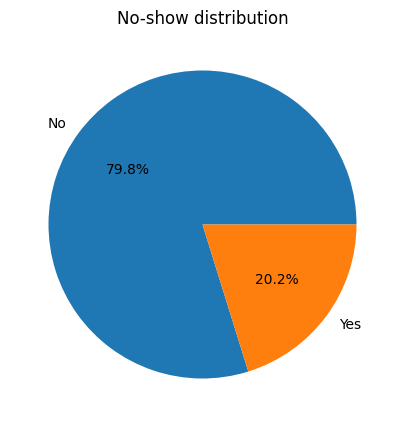

In [10]:
# 'No-show'비율 그래프 확인
no_show_counts = df['No-show'].value_counts()

plt.figure(figsize=(5,5))  # 차트의 크기 설정
plt.pie(no_show_counts, labels = no_show_counts.index, autopct='%1.1f%%')  # 파이 차트.
plt.title('No-show distribution')  # 그래프 제목
plt.show()

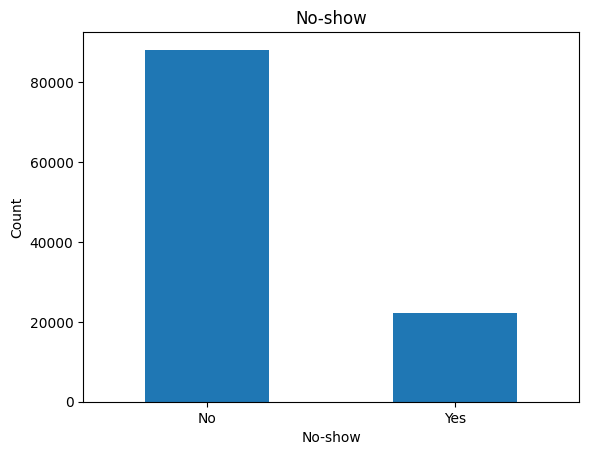

In [11]:
#  막대 그래프 
sms_counts = df['No-show'].value_counts()

sms_counts.plot(kind='bar')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.title('No-show')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

<ipython-input-12-0a490e50bc6f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), #상관관계


<Axes: >

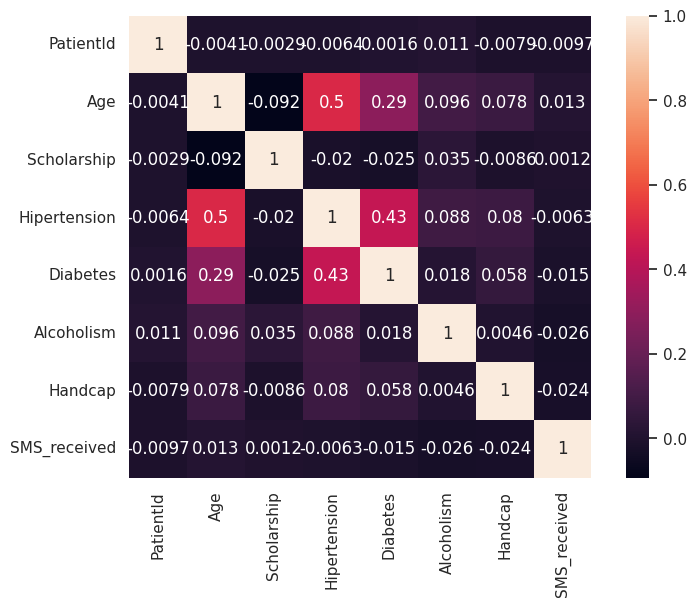

In [12]:
sns.set(font_scale = 1.2)
sns.set(rc = {'figure.figsize':(9, 6)})
sns.heatmap(data = df.corr(), #상관관계
            square = True, 
            annot = True, 
            cbar = True
           ) 

In [13]:
print(df['Neighbourhood'].value_counts())

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


In [14]:
unique_Neighbourhood = set(df['Neighbourhood'])
print(unique_Neighbourhood)


{'ROMÃO', 'ANDORINHAS', 'ITARARÉ', 'GURIGICA', 'SANTO ANTÔNIO', 'ILHA DAS CAIEIRAS', 'SOLON BORGES', 'ILHA DE SANTA MARIA', 'SANTA LUÍZA', 'DE LOURDES', 'CENTRO', 'SÃO BENEDITO', 'DO QUADRO', 'JUCUTUQUARA', 'SÃO JOSÉ', 'ENSEADA DO SUÁ', 'PARQUE INDUSTRIAL', 'INHANGUETÁ', 'JARDIM CAMBURI', 'GOIABEIRAS', 'SANTA MARTHA', 'PRAIA DO SUÁ', 'DO MOSCOSO', 'JABOUR', 'MORADA DE CAMBURI', 'GRANDE VITÓRIA', 'CONSOLAÇÃO', 'JOANA D´ARC', 'ANTÔNIO HONÓRIO', 'MARUÍPE', 'SANTOS REIS', 'MONTE BELO', 'ILHA DO FRADE', 'REDENÇÃO', 'COMDUSA', 'UNIVERSITÁRIO', 'SANTA CLARA', 'MARIA ORTIZ', 'ARIOVALDO FAVALESSA', 'ILHA DO BOI', 'SÃO PEDRO', 'JARDIM DA PENHA', 'SÃO CRISTÓVÃO', 'PRAIA DO CANTO', 'BONFIM', 'FORTE SÃO JOÃO', 'MÁRIO CYPRESTE', 'SANTA TEREZA', 'BELA VISTA', 'FONTE GRANDE', 'SANTO ANDRÉ', 'PIEDADE', 'REPÚBLICA', 'NOVA PALESTINA', 'PONTAL DE CAMBURI', 'SANTA CECÍLIA', 'BENTO FERREIRA', 'PARQUE MOSCOSO', 'DO CABRAL', 'CRUZAMENTO', 'BOA VISTA', 'JESUS DE NAZARETH', 'SANTA LÚCIA', 'MATA DA PRAIA', 'AERO

ConversionError: ignored

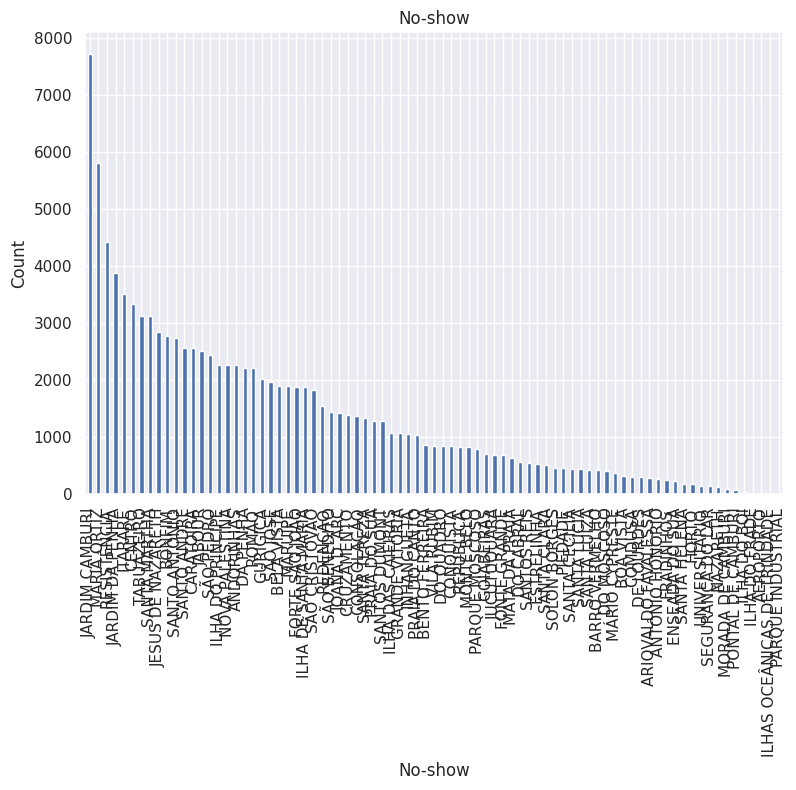

In [15]:
Neighbourhood_counts = df['Neighbourhood'].value_counts()

Neighbourhood_counts.plot(kind='bar')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.title('No-show')
plt.xticks(unique_Neighbourhood, ['No', 'Yes'], rotation=0)
plt.show()